In [63]:
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

In [64]:
area_price = pd.read_csv('./data/area_prices.csv')

In [65]:
area_price.isnull().sum()

sqft_living    0
price          0
dtype: int64

In [66]:
area_price.shape

(4600, 2)

In [67]:
area_price.head()

,sqft_living,price
0,1340,313000.0
1,3650,2384000.0
2,1930,342000.0
3,2000,420000.0
4,1940,550000.0


In [68]:
area_price = area_price.sort_values('price', ascending=False)

In [69]:
area_price

,sqft_living,price
4350,1180,26590000.0
4346,2190,12899000.0
2286,10040,7062500.0
2654,9640,4668000.0
2761,6430,4489000.0
...,...,...
4472,4060,0.0
4567,4080,0.0
4354,1490,0.0
4454,2090,0.0


## Ta bort extremvärdena

In [70]:
area_price = area_price.drop([4350,4346])
area_price

,sqft_living,price
2286,10040,7062500.0
2654,9640,4668000.0
2761,6430,4489000.0
3729,7050,3800000.0
1637,5550,3710000.0
...,...,...
4472,4060,0.0
4567,4080,0.0
4354,1490,0.0
4454,2090,0.0


### man kan även göra såhär för att ta bort extremvärden:

### area_price = area_price[area_price['price'] < 10000000]

In [71]:
area_price.describe()

,sqft_living,price
count,4598.000000,4.598000e+03
mean,2139.544585,5.436148e+05
std,963.312203,3.705838e+05
min,370.000000,0.000000e+00
25%,1460.000000,3.226250e+05
50%,1980.000000,4.604435e+05
75%,2620.000000,6.537500e+05
max,13540.000000,7.062500e+06


array([[<Axes: title={'center': 'sqft_living'}>,
        <Axes: title={'center': 'price'}>]], dtype=object)

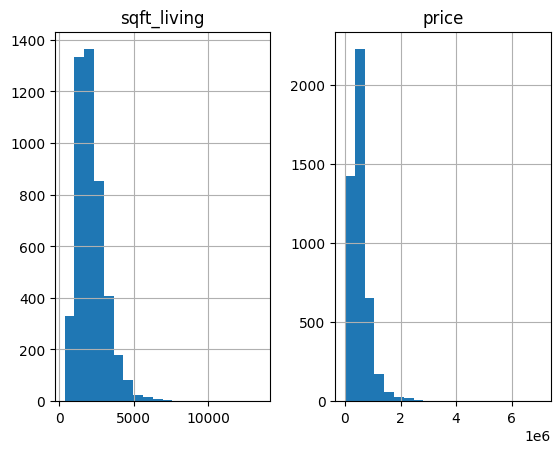

In [72]:
area_price.hist(bins=20)

In [73]:
x = area_price['sqft_living']
y = area_price['price']

Text(0, 0.5, 'Price')

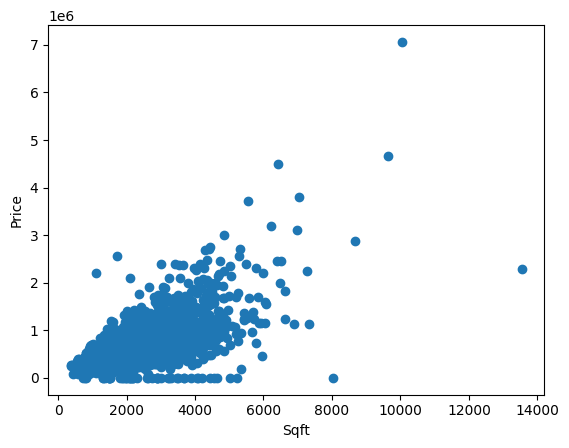

In [74]:
plt.scatter(x,y)
plt.xlabel('Sqft')
plt.ylabel('Price')

In [75]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)

In [76]:
x_train

511     2350
669     1250
689      980
1288    2440
4075    1810
        ... 
1877     770
1236    1700
266     2420
1284    1670
2210    2510
Name: sqft_living, Length: 3448, dtype: int64

In [77]:
y_train

511     870300.0
669     299000.0
689     400000.0
1288    388000.0
4075    362000.0
          ...   
1877    275000.0
1236    149000.0
266     352000.0
1284    585000.0
2210    659000.0
Name: price, Length: 3448, dtype: float64

In [78]:
x_train = np.array(x_train).reshape(-1,1)
x_test = np.array(x_test).reshape(-1,1)

In [79]:
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [80]:
regressor.intercept_

-23628.419921490015

In [81]:
regressor.coef_

array([266.76850674])

In [82]:
y_pred_train = regressor.predict(x_train)

Text(0, 0.5, 'Price')

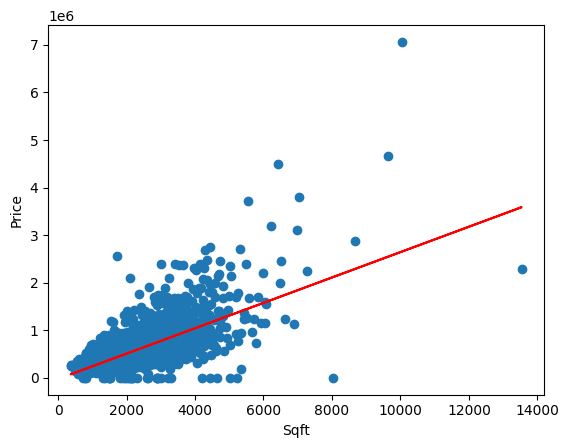

In [83]:
plt.scatter(x_train,y_train)
plt.plot(x_train, y_pred_train, color='red')
plt.xlabel('Sqft')
plt.ylabel('Price')

In [84]:
y_pred_test = regressor.predict(x_test)

Text(0, 0.5, 'Price')

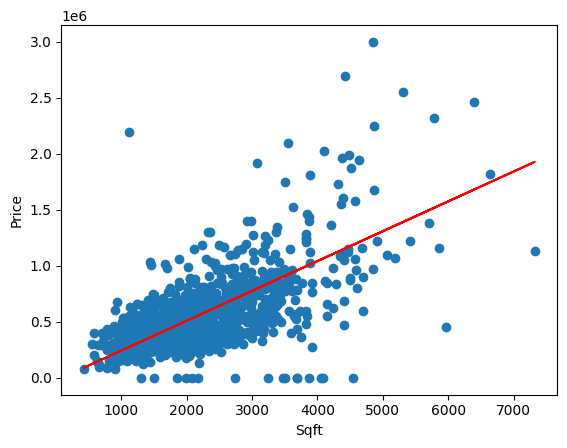

In [85]:
plt.scatter(x_test,y_test)
plt.plot(x_test, y_pred_test, color='red')
plt.xlabel('Sqft')
plt.ylabel('Price')

Robert kör med regressor.score! Verkar vara att man testar både x och y, r2_score är för att testa predicten

In [86]:
regressor.score(x_train,y_train)

0.4599904330760545

In [87]:
regressor.score(x_test, y_test)

0.4004115284036369

In [88]:
r2_score(y_train,y_pred_train)

0.4599904330760545

In [89]:
r2_score(y_test,y_pred_test)

0.4004115284036369

# VG del

In [90]:
house_price = pd.read_csv('./data/house_prices.csv')

In [91]:
house_price.isnull().sum()

Unnamed: 0       0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
city             0
statezip         0
country          0
dtype: int64

In [92]:
house_price = house_price.drop('Unnamed: 0', axis=1)

In [93]:
house_price.shape

(4598, 16)

In [94]:
house_price.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,Shoreline,WA 98133,USA
1,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,Seattle,WA 98119,USA
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,Kent,WA 98042,USA
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,Bellevue,WA 98008,USA
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,Redmond,WA 98052,USA


In [95]:
house_price.describe()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated
count,4.598000e+03,4598.000000,4598.000000,4598.000000,4.598000e+03,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000,4598.000000
mean,5.436148e+05,3.401044,2.160776,2139.544585,1.485480e+04,1.512288,0.007177,0.240757,3.451718,1827.466507,312.078077,1970.784906,808.524793
std,3.705838e+05,0.909007,0.783932,963.312203,3.589205e+04,0.538299,0.084422,0.778558,0.677296,862.293944,464.190168,29.735870,979.397082
min,0.000000e+00,0.000000,0.000000,370.000000,6.380000e+02,1.000000,0.000000,0.000000,1.000000,370.000000,0.000000,1900.000000,0.000000
25%,3.226250e+05,3.000000,1.750000,1460.000000,5.000250e+03,1.000000,0.000000,0.000000,3.000000,1190.000000,0.000000,1951.000000,0.000000
50%,4.604435e+05,3.000000,2.250000,1980.000000,7.683000e+03,1.500000,0.000000,0.000000,3.000000,1590.000000,0.000000,1976.000000,0.000000
75%,6.537500e+05,4.000000,2.500000,2620.000000,1.100000e+04,2.000000,0.000000,0.000000,4.000000,2300.000000,610.000000,1997.000000,1999.000000
max,7.062500e+06,9.000000,8.000000,13540.000000,1.074218e+06,3.500000,1.000000,4.000000,5.000000,9410.000000,4820.000000,2014.000000,2014.000000


array([[<Axes: title={'center': 'price'}>,
        <Axes: title={'center': 'bedrooms'}>,
        <Axes: title={'center': 'bathrooms'}>,
        <Axes: title={'center': 'sqft_living'}>],
       [<Axes: title={'center': 'sqft_lot'}>,
        <Axes: title={'center': 'floors'}>,
        <Axes: title={'center': 'waterfront'}>,
        <Axes: title={'center': 'view'}>],
       [<Axes: title={'center': 'condition'}>,
        <Axes: title={'center': 'sqft_above'}>,
        <Axes: title={'center': 'sqft_basement'}>,
        <Axes: title={'center': 'yr_built'}>],
       [<Axes: title={'center': 'yr_renovated'}>, <Axes: >, <Axes: >,
        <Axes: >]], dtype=object)

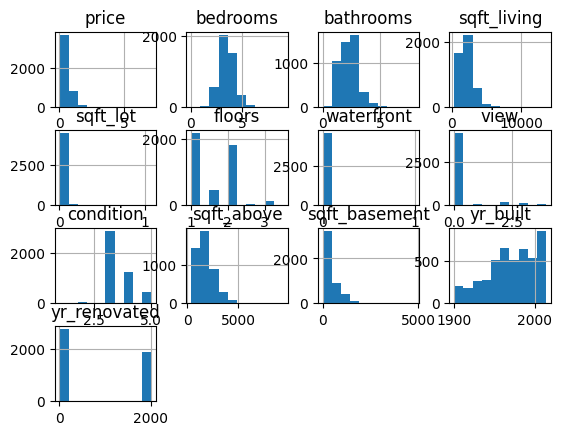

In [96]:
house_price.hist()

In [97]:
house_price['city'] = house_price['city'].astype('category')
house_price['city'] = house_price['city'].cat.codes
house_price['country'] = house_price['country'].astype('category')
house_price['country'] = house_price['country'].cat.codes
house_price['statezip'] = house_price['statezip'].str.replace('WA ', '')

In [98]:
house_price

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,98133,0
1,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,98119,0
2,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,98042,0
3,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,98008,0
4,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,98052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,98133,0
4594,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,98007,0
4595,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,98059,0
4596,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,98178,0


När Robert körde x så droppar han price, city, statezip och country då dom är textdata

In [99]:
x = house_price.drop(columns='price')
x

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,98133,0
1,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,98119,0
2,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,98042,0
3,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,98008,0
4,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,98052,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4593,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,98133,0
4594,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,98007,0
4595,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,98059,0
4596,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,98178,0


In [100]:
y = house_price['price']

In [101]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size= 0.3, random_state=0)

In [102]:
regressor = LinearRegression()

In [103]:
regressor.fit(x_train,y_train)

LinearRegression()

In [104]:
regressor.intercept_

44213573.4449149

In [105]:
regressor.coef_

array([-5.57469550e+04,  3.34119303e+04,  1.79911071e+02, -6.08390819e-01,
        6.46084549e+04,  3.65635392e+05,  5.06522752e+04,  2.42242903e+04,
        8.57766220e+01,  9.41344491e+01, -2.52592283e+03,  7.72887831e+00,
        2.21499164e+03, -4.01648649e+02,  0.00000000e+00])

In [106]:
y_pred_train = regressor.predict(x_train)

In [107]:
y_pred_train

array([ 798437.21922725, 1212200.0841656 ,  449027.98730854, ...,
        451471.83345017,  951935.77980715,  380042.3747706 ])

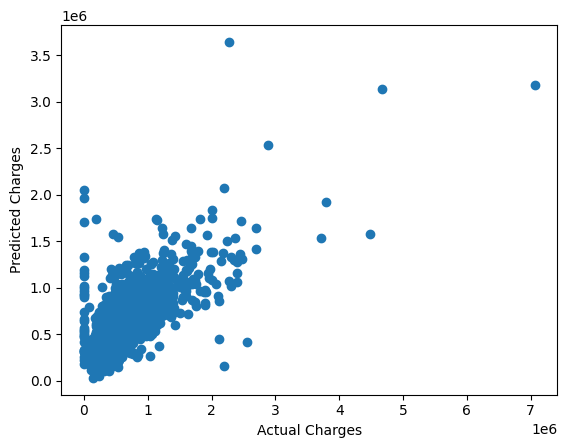

In [108]:
plt.scatter(y_train,y_pred_train)
plt.xlabel("Actual Charges")
plt.ylabel("Predicted Charges")
plt.show()

In [109]:
regressor.score(x_train,y_train)

0.5246455884162471

In [110]:
regressor.score(x_test,y_test)

0.5534139827557769

In [111]:
r2_score(y_train,y_pred_train)

0.5246455884162471

In [112]:
y_pred_test = regressor.predict(x_test)

In [113]:
r2_score(y_test,y_pred_test)

0.5534139827557769

In [114]:
regressor.coef_

array([-5.57469550e+04,  3.34119303e+04,  1.79911071e+02, -6.08390819e-01,
        6.46084549e+04,  3.65635392e+05,  5.06522752e+04,  2.42242903e+04,
        8.57766220e+01,  9.41344491e+01, -2.52592283e+03,  7.72887831e+00,
        2.21499164e+03, -4.01648649e+02,  0.00000000e+00])

In [115]:
regressor.feature_names_in_

array(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement',
       'yr_built', 'yr_renovated', 'city', 'statezip', 'country'],
      dtype=object)

In [116]:
corr = x.corr()

In [117]:
corr.style.background_gradient(cmap='coolwarm')

c:\Kodprojekt\Jupyter\env\lib\site-packages\pandas\io\formats\style.py:3618: RuntimeWarning: All-NaN slice encountered
  smin = np.nanmin(gmap) if vmin is None else vmin
c:\Kodprojekt\Jupyter\env\lib\site-packages\pandas\io\formats\style.py:3619: RuntimeWarning: All-NaN slice encountered
  smax = np.nanmax(gmap) if vmax is None else vmax


,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
bedrooms,1.000000,0.545978,0.594883,0.068795,0.177755,-0.003499,0.110976,0.025098,0.484658,0.334217,0.142500,-0.061061,-0.130454,-0.153420,nan
bathrooms,0.545978,1.000000,0.761206,0.107841,0.486583,0.076238,0.211985,-0.119913,0.689982,0.297962,0.463626,-0.216094,-0.097141,-0.206621,nan
sqft_living,0.594883,0.761206,1.000000,0.210521,0.344760,0.117611,0.310986,-0.062657,0.876443,0.447146,0.287990,-0.123052,-0.109858,-0.211272,nan
sqft_lot,0.068795,0.107841,0.210521,1.000000,0.003690,0.017236,0.073889,0.000579,0.216433,0.034832,0.050731,-0.022746,-0.079156,-0.133587,nan
floors,0.177755,0.486583,0.344760,0.003690,1.000000,0.021993,0.031090,-0.275071,0.522733,-0.255580,0.467656,-0.234016,0.078533,-0.064775,nan
waterfront,-0.003499,0.076238,0.117611,0.017236,0.021993,1.000000,0.360931,0.000355,0.078897,0.097512,-0.023561,0.008634,0.001453,0.005965,nan
view,0.110976,0.211985,0.310986,0.073889,0.031090,0.360931,1.000000,0.063096,0.174271,0.321644,-0.064457,0.022999,0.001350,0.095456,nan
condition,0.025098,-0.119913,-0.062657,0.000579,-0.275071,0.000355,0.063096,1.000000,-0.178145,0.200898,-0.399977,-0.186563,-0.010368,0.038554,nan
sqft_above,0.484658,0.689982,0.876443,0.216433,0.522733,0.078897,0.174271,-0.178145,1.000000,-0.038790,0.408680,-0.160525,-0.121774,-0.270769,nan
sqft_basement,0.334217,0.297962,0.447146,0.034832,-0.255580,0.097512,0.321644,0.200898,-0.038790,1.000000,-0.161524,0.042832,-0.001772,0.064546,nan
